# Final Project

**From bCourses** 

Final Project Rubric
Your slides should include:

Title, Authors  
(15%) Motivation: Introduce your question and why the question is interesting. Explain what has been done before in this space. Describe your overall plan to approach your question. Provide a summary of your results.  

(15%) Data: Describe in detail the data you are using, including the source(s) of the data and relevant statistics.  

(15%) Modeling: Describe in detail the models (baseline + improvement over baseline) that you use in your approach.  

(30%) Experiments: Provide insight into the effect of different hyperperameter choices. Please include tables, figures, graphs to illustrate your experiments.  

(10%) Conclusions: Summarize the key results, what has been learned, and avenues for future work.  

(15%) Code submission: Provide link to your team's GitHub repo. The code should be well commented and organized.  

Contributions: Specify the contributions of each author (e.g., data processing, algorithm implementation, slides, etc.). Note that the final project grade is individual, based on each member's contribution and team size.

**From Github - Spring 2024**  

Project Submission Guidelines and Grading
In your presentation include a slide that lists the contribution of each team member – e.g, X did data processing, Y implemented component linear regression experiments, etc  
.
In your presentation include a slide with references (i.e. cite any outside code/materials use  
d)
In your presentation include a slide answering all the questions from the NeurIPS checkl.

https://neurips.cc/Conferences/2021/PaperInformation/PaperChecklistst.

## Motivation

## Data

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GRU, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

In [62]:
import yfinance as yf

ticker_symbol = 'MSFT'  

start_date = '2021-03-01'
end_date = '2024-03-31'

df = yf.download(ticker_symbol, start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,235.899994,237.470001,233.149994,236.940002,230.847672,25324000
2021-03-02,237.009995,237.300003,233.449997,233.869995,227.856613,22812500
2021-03-03,232.160004,233.580002,227.259995,227.559998,221.708893,34029500
2021-03-04,226.740005,232.490005,224.259995,226.729996,220.900223,44727800
2021-03-05,229.520004,233.270004,226.460007,231.600006,225.645004,41872800
...,...,...,...,...,...,...
2024-03-22,429.700012,429.859985,426.070007,428.739990,428.739990,17636500
2024-03-25,425.239990,427.410004,421.609985,422.859985,422.859985,18060500
2024-03-26,425.609985,425.989990,421.350006,421.649994,421.649994,16725600


In [63]:
first_index = df.index[0]
last_index = df.index[-1]

diff = last_index - first_index
print("First index:", first_index)
print("Last index:", last_index)
print(diff)

First index: 2021-03-01 00:00:00
Last index: 2024-03-28 00:00:00
1123 days 00:00:00


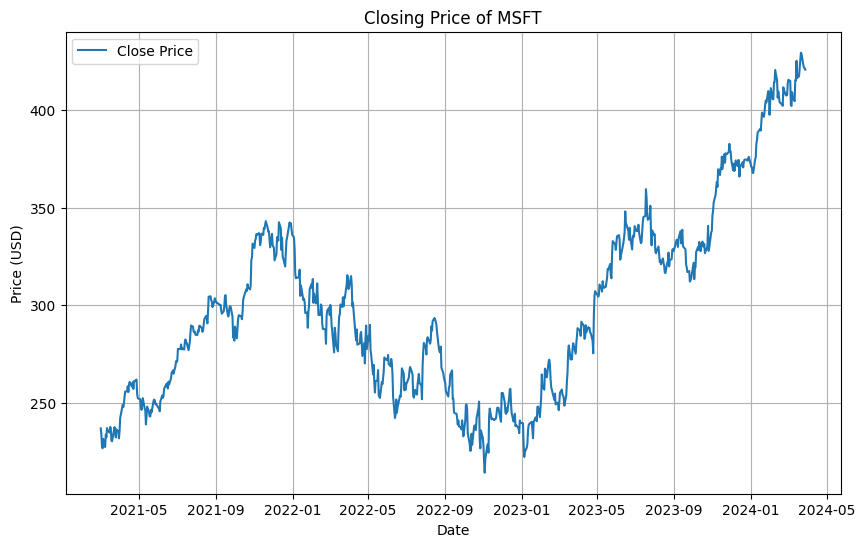

In [64]:
close_prices = df['Close']

plt.figure(figsize=(10, 6)) 
plt.plot(close_prices, label='Close Price') 
plt.title(f'Closing Price of {ticker_symbol}')  
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Check for null values

In [65]:
null_counts = df.isnull().sum()
null_counts

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Check differences on price. High - low, open -close, etc

In [66]:
df['open-close'] = df['Open'] - df['Close']
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']

df.head()

,Open,High,Low,Close,Adj Close,Volume,open-close,open-high,open-low,close-high,close-low,high-low
Date,,,,,,,,,,,,
2021-03-01,235.899994,237.470001,233.149994,236.940002,230.847672,25324000,-1.040009,-1.570007,2.750000,-0.529999,3.790009,4.320007
2021-03-02,237.009995,237.300003,233.449997,233.869995,227.856613,22812500,3.139999,-0.290009,3.559998,-3.430008,0.419998,3.850006
2021-03-03,232.160004,233.580002,227.259995,227.559998,221.708893,34029500,4.600006,-1.419998,4.900009,-6.020004,0.300003,6.320007
2021-03-04,226.740005,232.490005,224.259995,226.729996,220.900223,44727800,0.010010,-5.750000,2.480011,-5.760010,2.470001,8.230011
2021-03-05,229.520004,233.270004,226.460007,231.600006,225.645004,41872800,-2.080002,-3.750000,3.059998,-1.669998,5.139999,6.809998


Count positive and negative values in "open-close"

In [67]:
positive_count = (df['open-close'] > 0).sum()
negative_count = (df['open-close'] < 0).sum()


counts_df = pd.DataFrame({'Count': [positive_count, negative_count]}, index=['Positive', 'Negative'])


counts_df


,Count
Positive,367
Negative,408


we need to add more data exploration...

In [68]:
close_prices = df['Close']

## Modeling

the baseline could be: the mean from the past 3 days..

#### Train, Validation and Test Split

Lets define our split precentages

In [69]:
train_percent = 0.7
val_percent = 0.15

In [70]:
train_size = int(len(close_prices) * train_percent)
validation_size = int(len(close_prices) * val_percent)
test_size = len(close_prices) - train_size - validation_size

train_data = close_prices[:train_size]
validation_data = close_prices[train_size:train_size + validation_size]
test_data = close_prices[train_size + validation_size:]

Lets visualize the splitted data

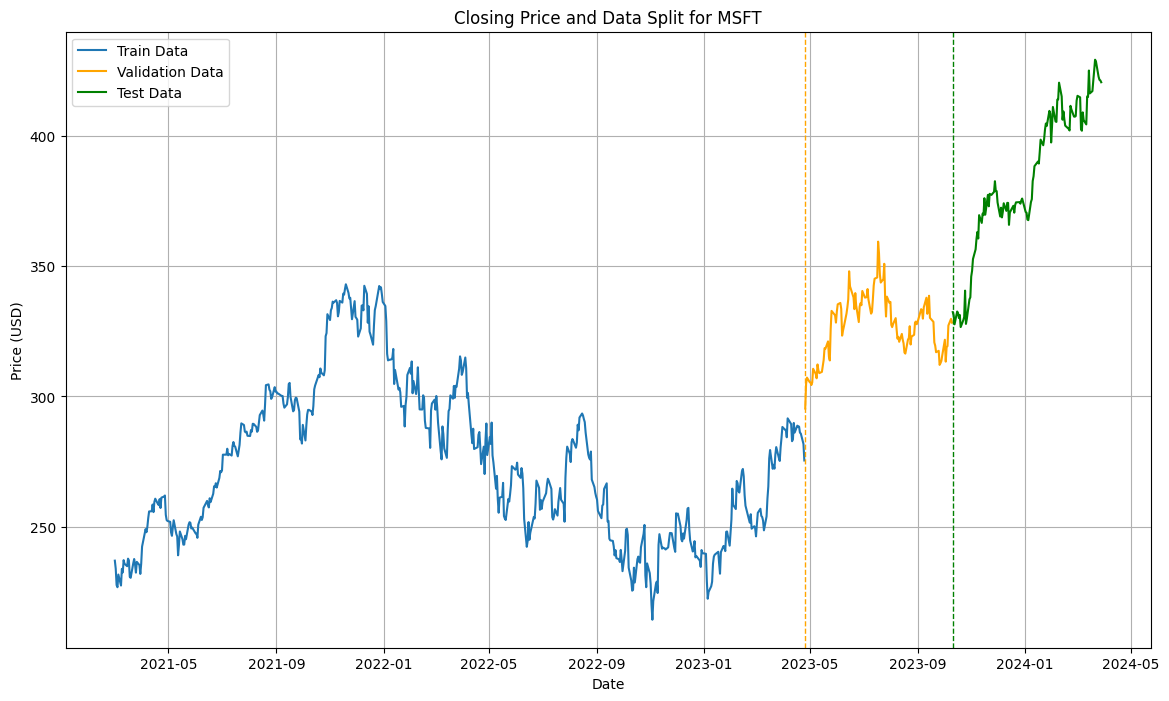

In [71]:
plt.figure(figsize=(14, 8))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(validation_data.index, validation_data, label='Validation Data', color='orange')
plt.plot(test_data.index, test_data, label='Test Data', color='green')

plt.axvline(close_prices.index[train_size], color='orange', linestyle='--', linewidth=1)
plt.axvline(close_prices.index[train_size + validation_size], color='green', linestyle='--', linewidth=1)

plt.title(f'Closing Price and Data Split for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### Data preparation

Lets define a `Scaler` to scale the input data to a specified range: between 0 and 1.  
Then we can create the `scaled_data` for future tasks.

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

Lets create a function `create_sequences`:  
This function creates sequences of input-output pairs from the time series data. It takes the scaled data and a parameter sequence_length, which determines the length of each input sequence. It then creates input sequences (xs) and corresponding output values (ys). Each x is a sequence of sequence_length consecutive data points, and the corresponding y is the data point immediately following the sequence.

In [73]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

Define `sequence_length` and create X, y

In [74]:
sequence_length = 60 
X, y = create_sequences(scaled_data, sequence_length)

Train, Validation and Test Split on `X, y`

In [75]:
X_train = X[:train_size]
X_val = X[train_size:train_size + validation_size]
X_test = X[train_size + validation_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + validation_size]
y_test = y[train_size + validation_size:]


### Models

Base line

For a very simple baseline model in time series forecasting before employing machine learning techniques, we can use a persistence model.  
The persistence model simply predicts the next value in the sequence to be the same as the last value observed.

In [76]:
def persistence_model_predict(X):
    return X[:, -1]

In [77]:
# Calculate the performance metrics for the persistence model
train_predictions = persistence_model_predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_rmse = np.sqrt(mean_squared_error(actual_train, train_predictions))

val_predictions = persistence_model_predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))

test_predictions = persistence_model_predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_rmse = np.sqrt(mean_squared_error(actual_test, test_predictions))

# Create a dataframe
data_after = {'Set': ['Training', 'Validation', 'Test'],
        'Base': [train_rmse, val_rmse, test_rmse]}
df_results_base = pd.DataFrame(data_after)

df_results_base

,Set,Base
0,Training,5.146477
1,Validation,4.402924
2,Test,5.052382


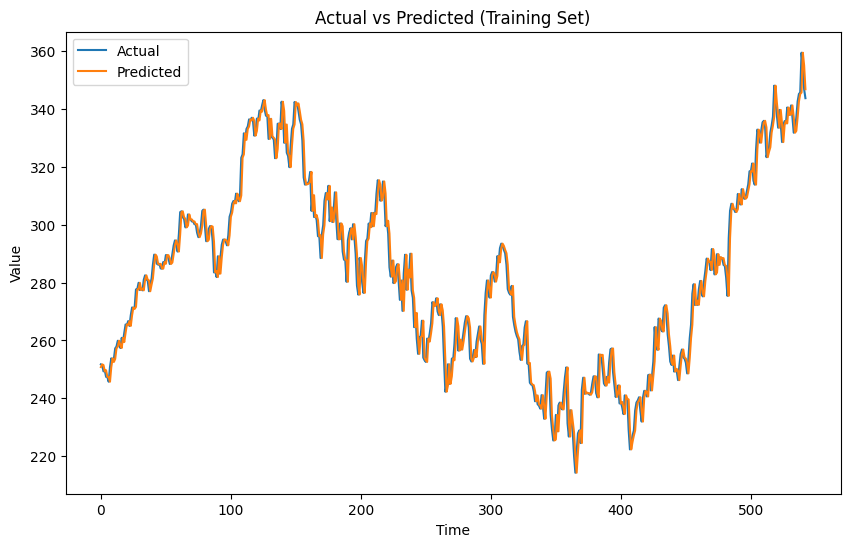

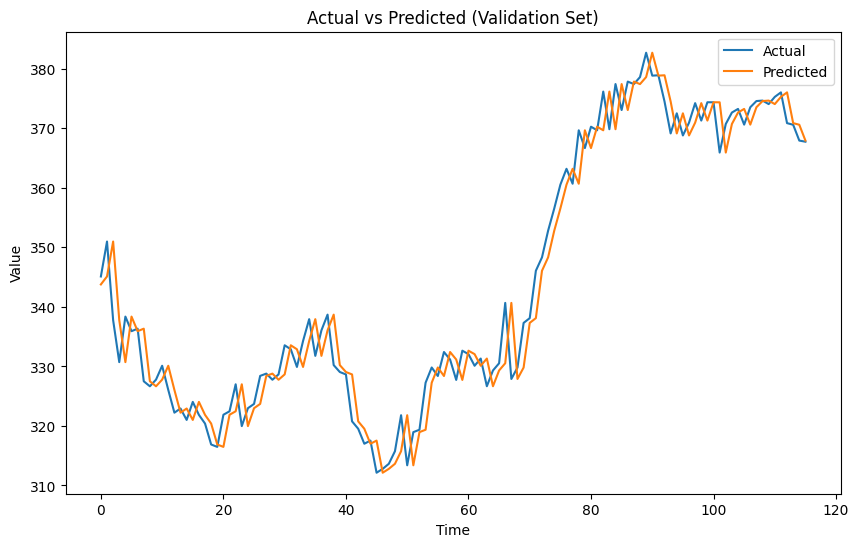

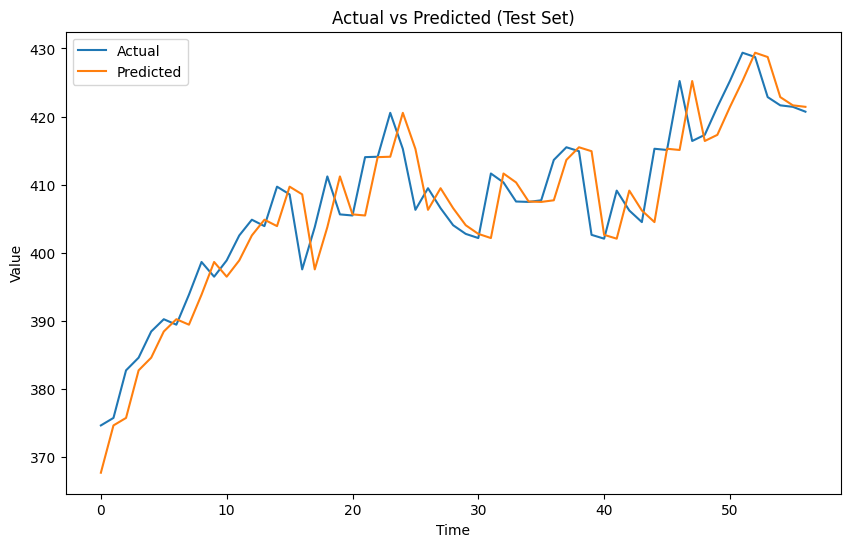

In [78]:
# Plotting function
def plot_actual_vs_predicted(actual, predicted, set_name):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f'Actual vs Predicted ({set_name} Set)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plot actual vs predicted for training set
plot_actual_vs_predicted(actual_train, train_predictions, 'Training')

# Plot actual vs predicted for validation set
plot_actual_vs_predicted(actual_val, val_predictions, 'Validation')

# Plot actual vs predicted for test set
plot_actual_vs_predicted(actual_test, test_predictions, 'Test')


New Models

1

In [79]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

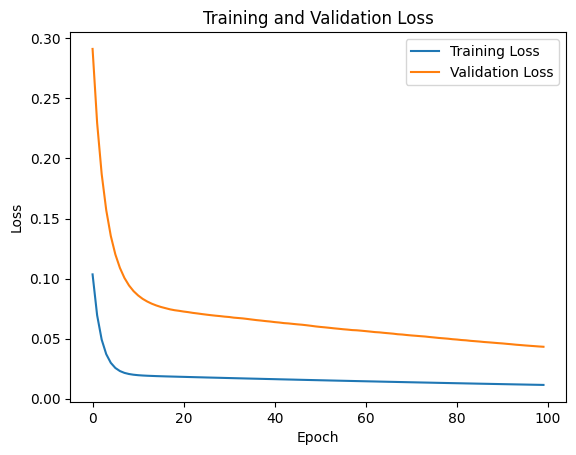

In [80]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [81]:
# Predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_rmse = np.sqrt(mean_squared_error(actual_train, train_predictions))

# Predictions on the validation data
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)
actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))

# Predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_rmse = np.sqrt(mean_squared_error(actual_test, test_predictions))

# Create a dataframe
data_after = {'Set': ['Training', 'Validation', 'Test'],
        'LSTM 1': [train_rmse, val_rmse, test_rmse]}
df_results_1 = pd.DataFrame(data_after)

# Print the dataframe
df_results_1


2/2 [==============================] - 0s 10ms/step


,Set,LSTM 1
0,Training,23.060743
1,Validation,44.753373
2,Test,88.418625


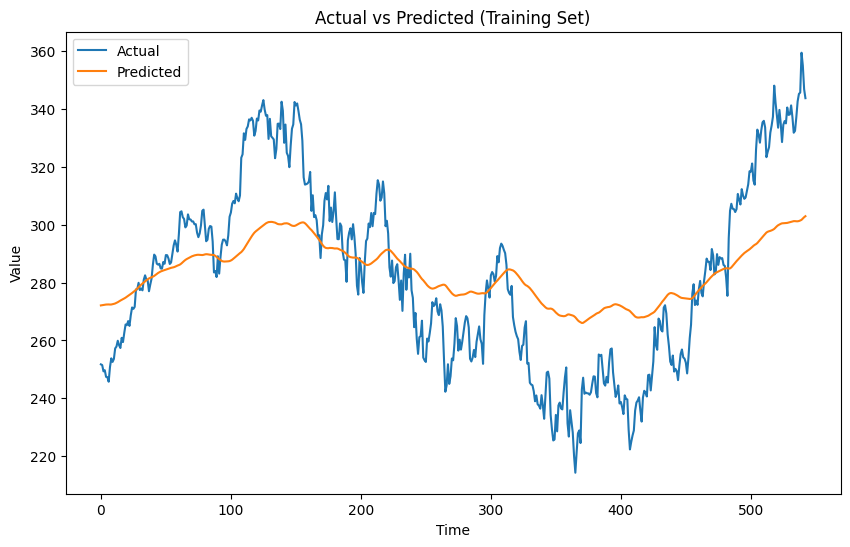

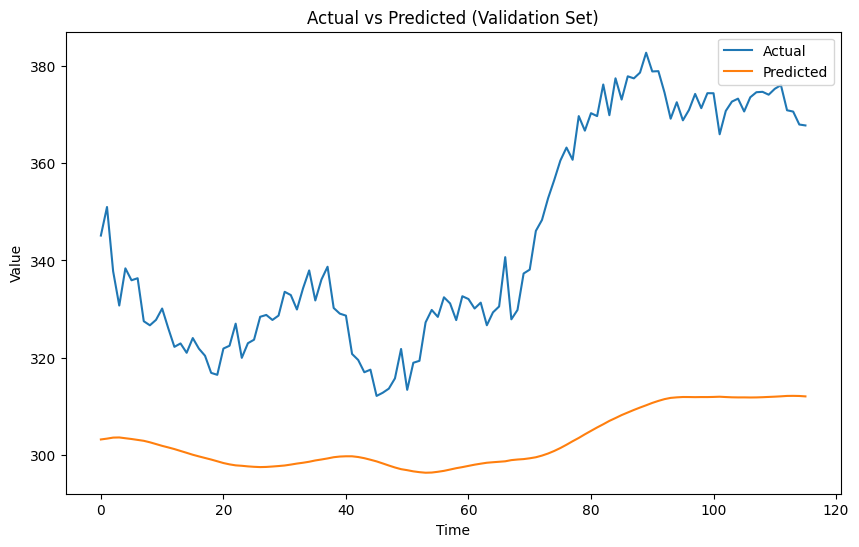

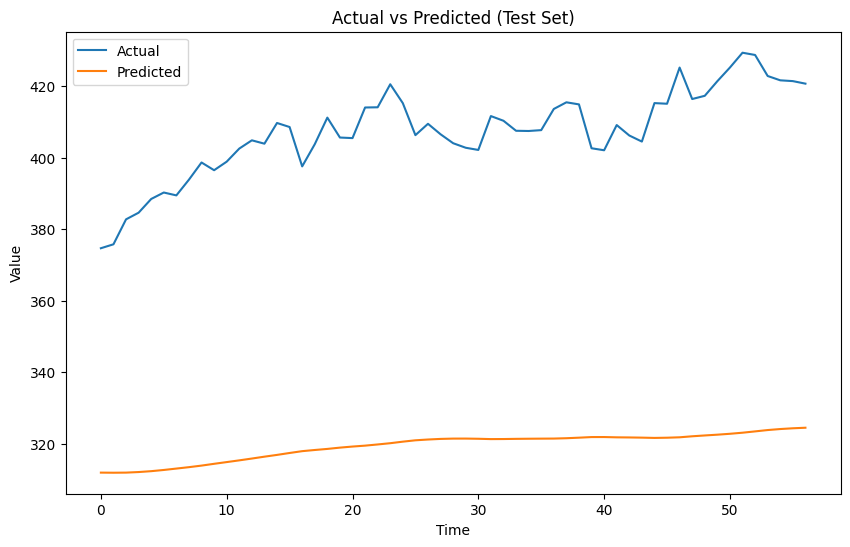

In [82]:
plot_actual_vs_predicted(actual_train, train_predictions, 'Training')

# Plot actual vs predicted for validation set
plot_actual_vs_predicted(actual_val, val_predictions, 'Validation')

# Plot actual vs predicted for test set
plot_actual_vs_predicted(actual_test, test_predictions, 'Test')

2

In [83]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

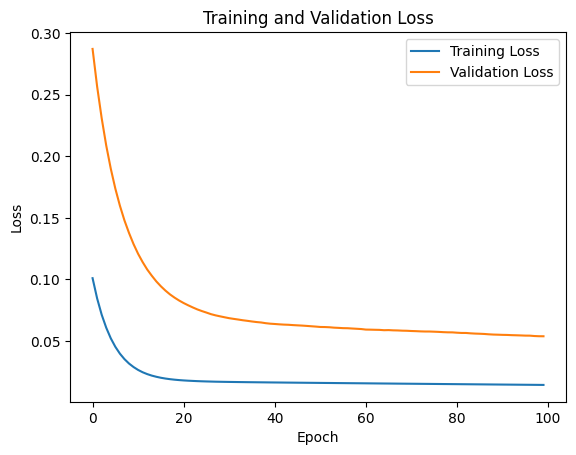

In [84]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [85]:
# Predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_rmse = np.sqrt(mean_squared_error(actual_train, train_predictions))

# Predictions on the validation data
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)
actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))

# Predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_rmse = np.sqrt(mean_squared_error(actual_test, test_predictions))

# Create a dataframe
data_after = {'Set': ['Training', 'Validation', 'Test'],
        'LSTM 2': [train_rmse, val_rmse, test_rmse]}
df_results_2 = pd.DataFrame(data_after)

# Print the dataframe
df_results_2

2/2 [==============================] - 0s 11ms/step


,Set,LSTM 2
0,Training,25.740512
1,Validation,49.913057
2,Test,96.661703


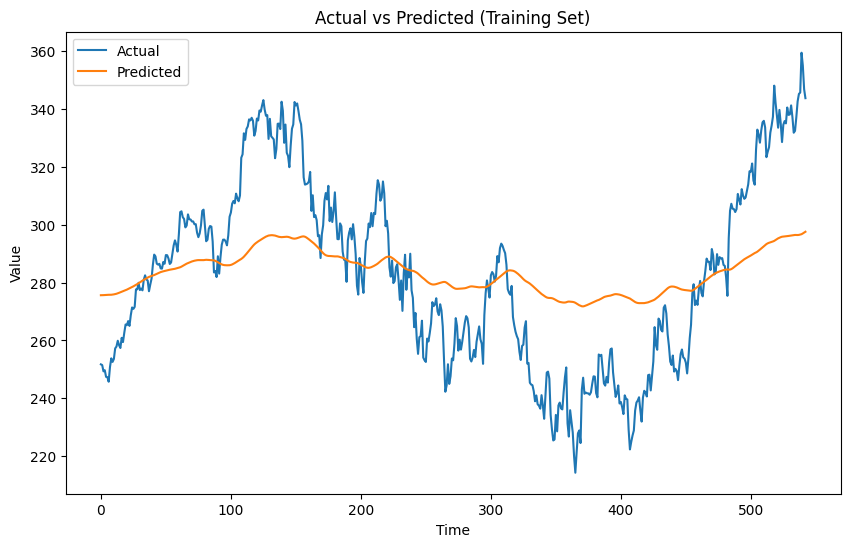

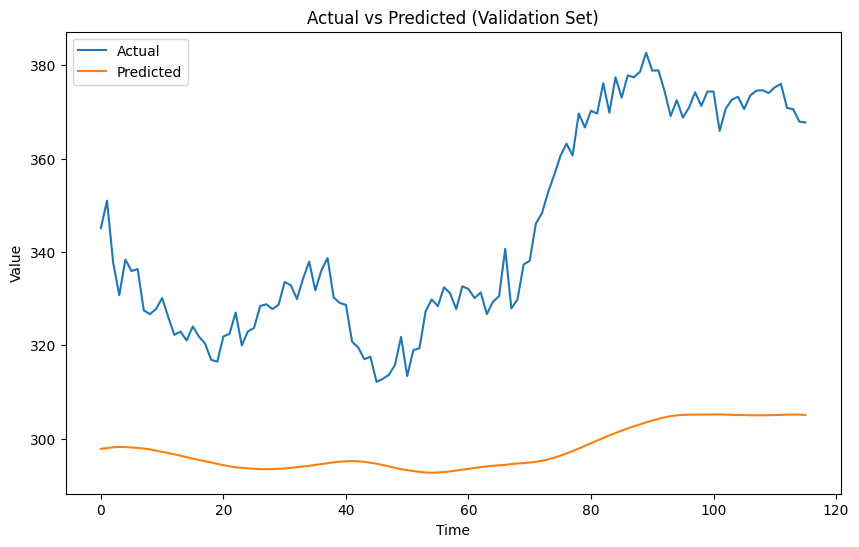

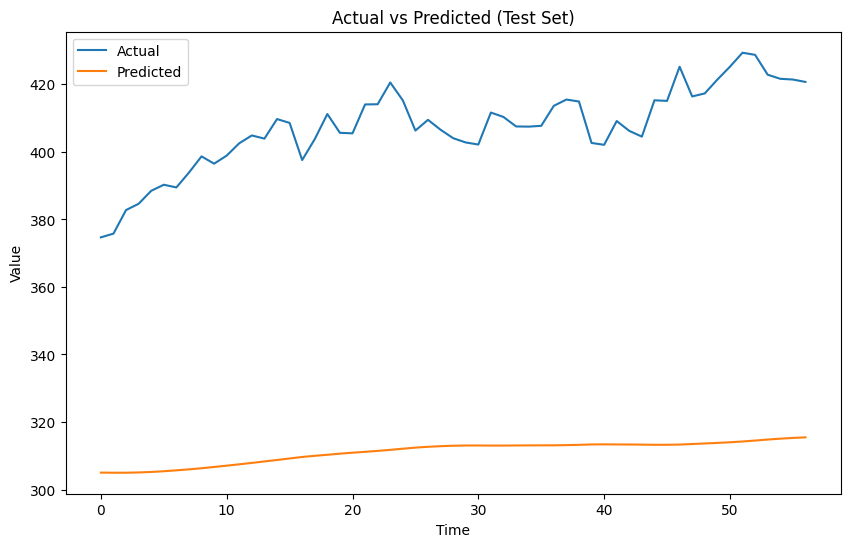

In [86]:
plot_actual_vs_predicted(actual_train, train_predictions, 'Training')

# Plot actual vs predicted for validation set
plot_actual_vs_predicted(actual_val, val_predictions, 'Validation')

# Plot actual vs predicted for test set
plot_actual_vs_predicted(actual_test, test_predictions, 'Test')

Model 3

In [87]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

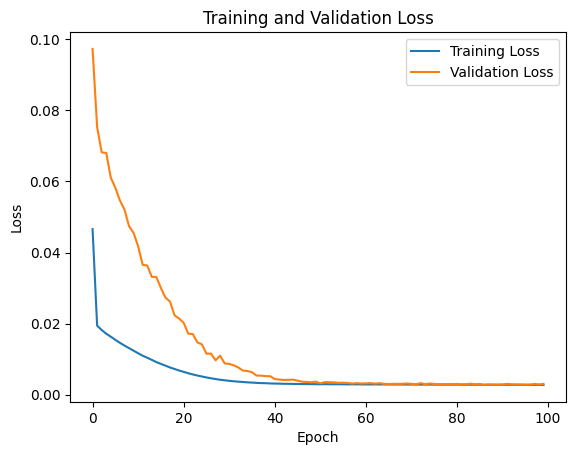

In [88]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [89]:
# Predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_rmse = np.sqrt(mean_squared_error(actual_train, train_predictions))

# Predictions on the validation data
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)
actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))

# Predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_rmse = np.sqrt(mean_squared_error(actual_test, test_predictions))

# Create a dataframe
data_after = {'Set': ['Training', 'Validation', 'Test'],
        'LSTM 3': [train_rmse, val_rmse, test_rmse]}
df_results_3 = pd.DataFrame(data_after)

# Print the dataframe
df_results_3

2/2 [==============================] - 0s 11ms/step


,Set,LSTM 3
0,Training,11.338296
1,Validation,11.866009
2,Test,20.631491


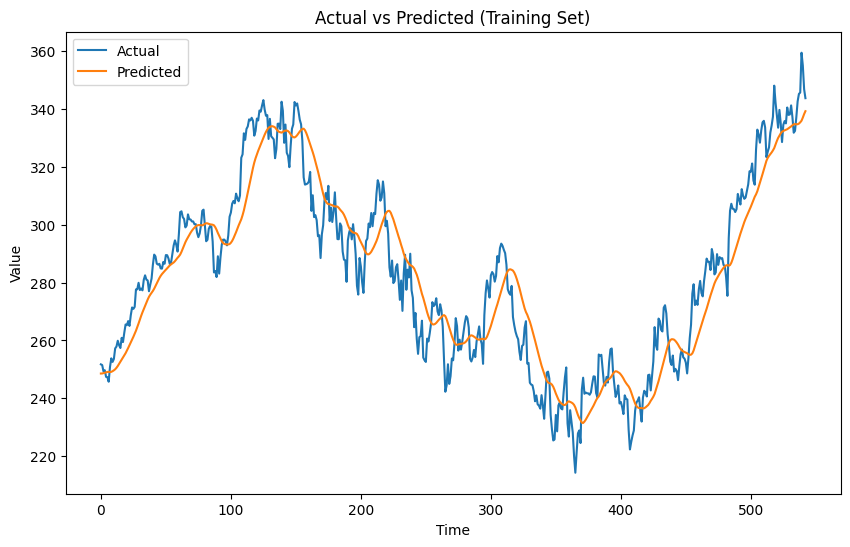

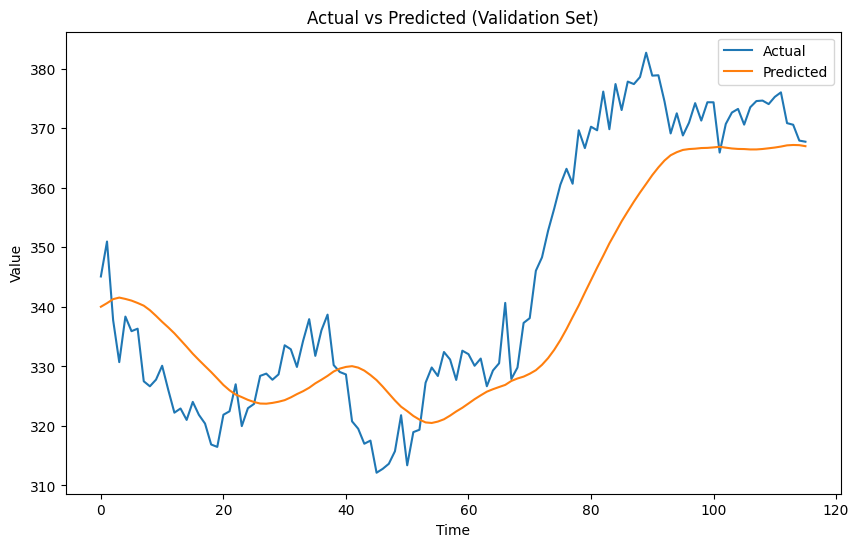

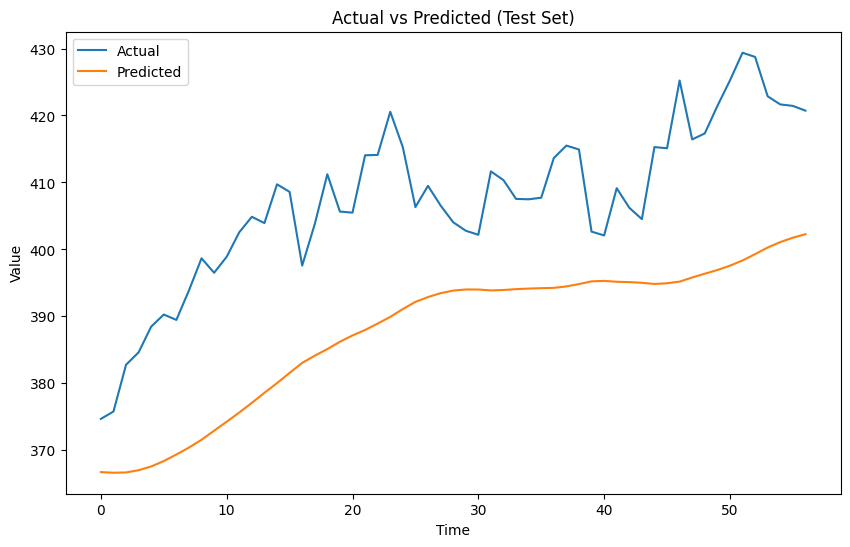

In [90]:
plot_actual_vs_predicted(actual_train, train_predictions, 'Training')

# Plot actual vs predicted for validation set
plot_actual_vs_predicted(actual_val, val_predictions, 'Validation')

# Plot actual vs predicted for test set
plot_actual_vs_predicted(actual_test, test_predictions, 'Test')

model 4

In [91]:
sequence_length = 90

In [92]:
X, y = create_sequences(scaled_data, sequence_length)

In [93]:
X.shape

(686, 90, 1)

In [94]:
X_train = X[:train_size]
X_val = X[train_size:train_size + validation_size]
X_test = X[train_size + validation_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + validation_size]
y_test = y[train_size + validation_size:]

In [95]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

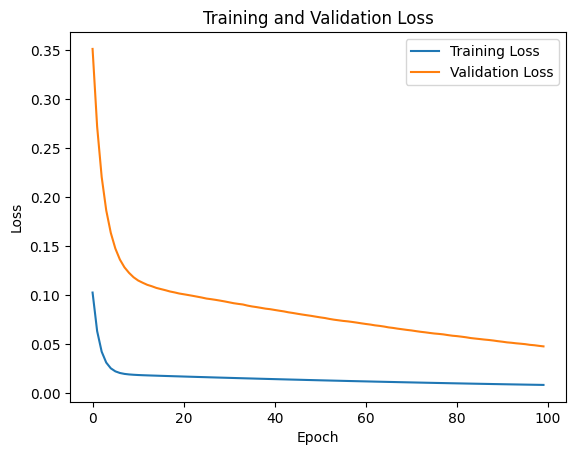

In [96]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [97]:
# Predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_rmse = np.sqrt(mean_squared_error(actual_train, train_predictions))

# Predictions on the validation data
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)
actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))

# Predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_rmse = np.sqrt(mean_squared_error(actual_test, test_predictions))

# Create a dataframe
data_after = {'Set': ['Training', 'Validation', 'Test'],
        'LSTM 4': [train_rmse, val_rmse, test_rmse]}
df_results_4 = pd.DataFrame(data_after)

# Print the dataframe
df_results_4

1/1 [==============================] - 0s 35ms/step


,Set,LSTM 4
0,Training,19.502738
1,Validation,46.944767
2,Test,72.119000


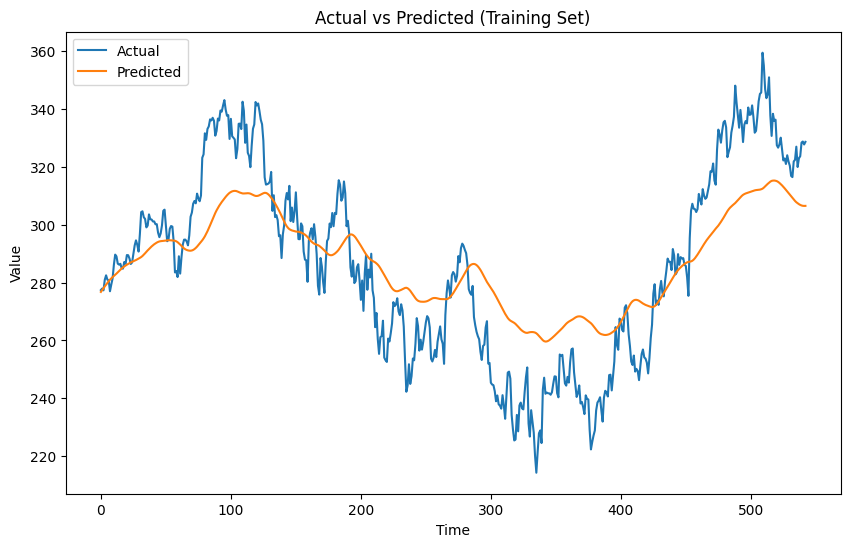

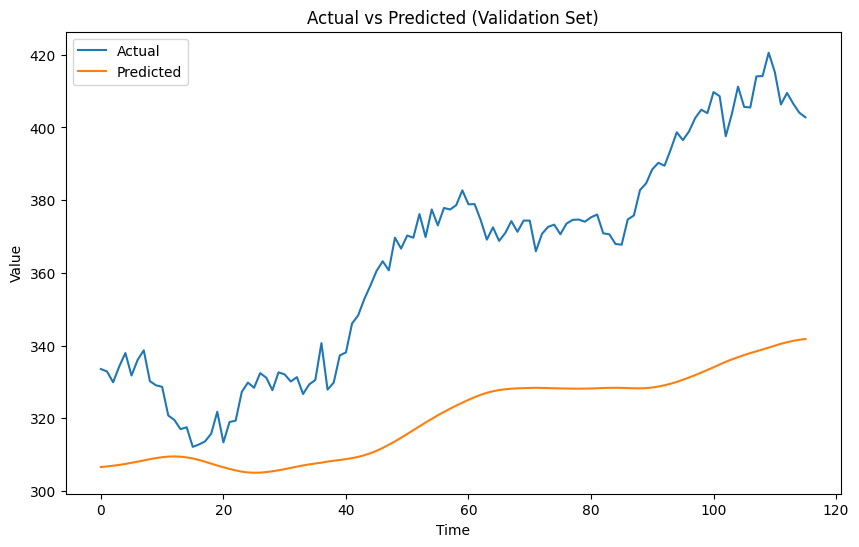

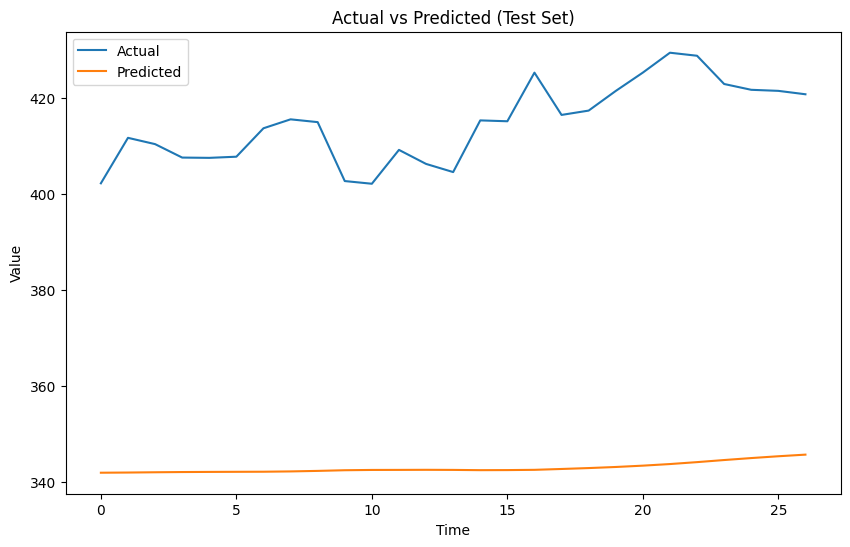

In [98]:
plot_actual_vs_predicted(actual_train, train_predictions, 'Training')

# Plot actual vs predicted for validation set
plot_actual_vs_predicted(actual_val, val_predictions, 'Validation')

# Plot actual vs predicted for test set
plot_actual_vs_predicted(actual_test, test_predictions, 'Test')

5

In [99]:
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

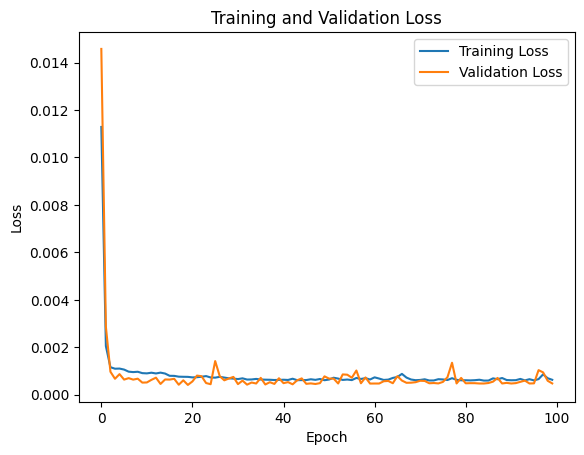

In [100]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [101]:
# Predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_rmse = np.sqrt(mean_squared_error(actual_train, train_predictions))

# Predictions on the validation data
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)
actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))
val_rmse = np.sqrt(mean_squared_error(actual_val, val_predictions))

# Predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_rmse = np.sqrt(mean_squared_error(actual_test, test_predictions))

# Create a dataframe
data_after = {'Set': ['Training', 'Validation', 'Test'],
        'GRU 4': [train_rmse, val_rmse, test_rmse]}
df_results_5 = pd.DataFrame(data_after)

# Print the dataframe
df_results_5


1/1 [==============================] - 0s 31ms/step


,Set,GRU 4
0,Training,5.225462
1,Validation,4.703049
2,Test,5.413713


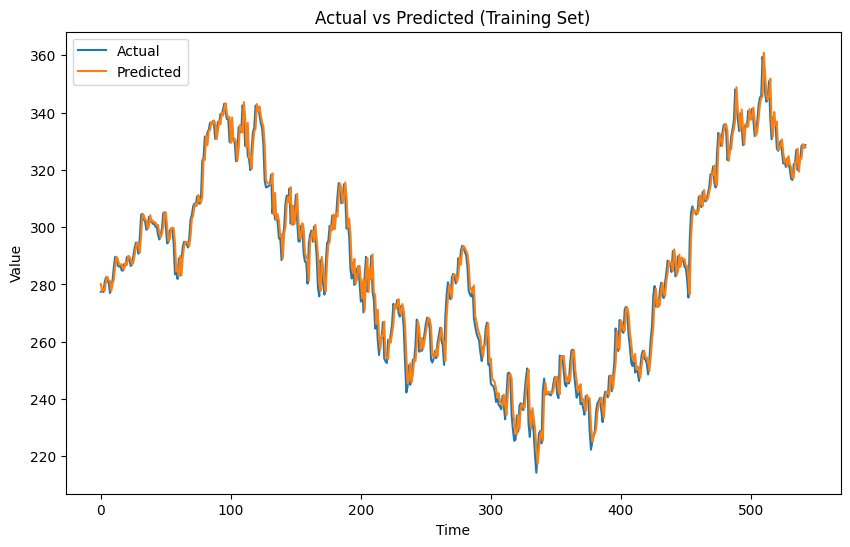

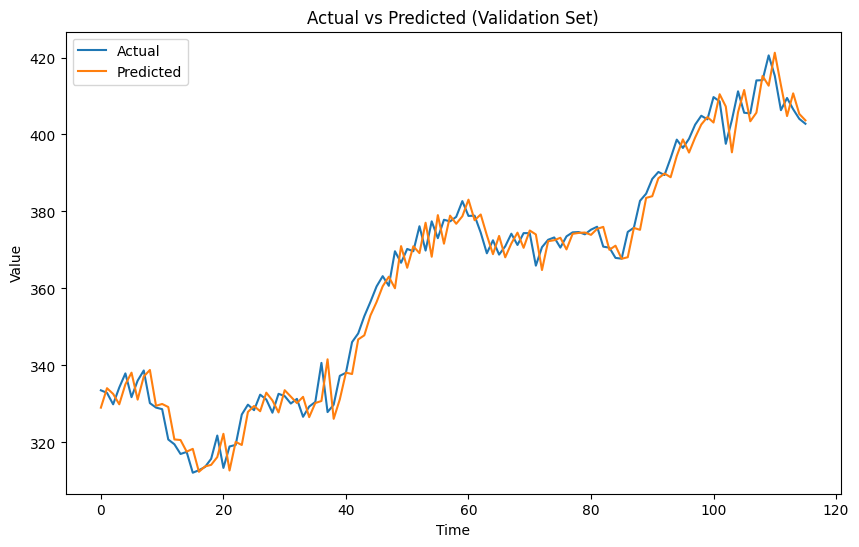

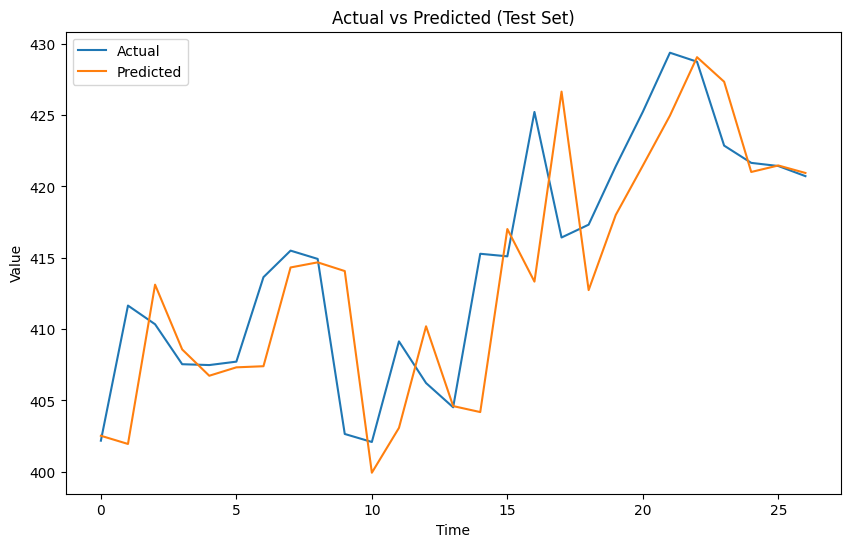

In [102]:
plot_actual_vs_predicted(actual_train, train_predictions, 'Training')

# Plot actual vs predicted for validation set
plot_actual_vs_predicted(actual_val, val_predictions, 'Validation')

# Plot actual vs predicted for test set
plot_actual_vs_predicted(actual_test, test_predictions, 'Test')

In [105]:
df_results_base

,Set,Base
0,Training,5.146477
1,Validation,4.402924
2,Test,5.052382


In [108]:
# Concatenate the dataframes along the columns
combined_df = pd.concat([df_results_base.set_index('Set').iloc[:, 0],  # Adjusted iloc to [:, 0]
                        df_results_1.set_index('Set').iloc[:, 0],
                        df_results_2.set_index('Set').iloc[:, 0],
                        df_results_3.set_index('Set').iloc[:, 0],
                        df_results_4.set_index('Set').iloc[:, 0],
                        df_results_5.set_index('Set').iloc[:, 0]], axis=1)

# Rename the columns to differentiate them
combined_df.columns = ['Base','LSTM 1', 'LSTM 2', 'LSTM 3', 'LSTM 4', 'GRU 4']

# Reset index to make 'Set' a column again
combined_df.reset_index(inplace=True)

combined_df


,Set,Base,LSTM 1,LSTM 2,LSTM 3,LSTM 4,GRU 4
0,Training,5.146477,23.060743,25.740512,11.338296,19.502738,5.225462
1,Validation,4.402924,44.753373,49.913057,11.866009,46.944767,4.703049
2,Test,5.052382,88.418625,96.661703,20.631491,72.119000,5.413713


Extra model

## Conclusions

## Contributions